In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [5]:
df = pd.read_csv("Train.csv")

In [6]:
df.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [7]:
enc=df['encounter_id']
enc

0        197029140
1        163571946
2        256497366
3        289891212
4         81873900
           ...    
66582    124202466
66583    145667070
66584    231061116
66585     84911682
66586    153167502
Name: encounter_id, Length: 66587, dtype: int64

In [8]:
df.shape

(66587, 49)

In [9]:
df.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'weight', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

In [11]:
df.describe()

,index,encounter_id,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,readmitted
count,66587.000000,6.658700e+04,6.658700e+04,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000
mean,50903.474282,1.653153e+08,5.422970e+07,4.397510,43.115533,1.331521,16.028744,0.365672,0.200460,0.637602,49.703387,7.424948,0.462012
std,29480.255515,1.030035e+08,3.878819e+07,2.980995,19.630417,1.705746,8.125304,1.221861,0.905503,1.255487,28.864879,1.933061,0.498559
min,0.000000,1.573800e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000283,1.000000,0.000000
25%,25166.500000,8.440328e+07,2.338646e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,24.622056,6.000000,0.000000
50%,51129.000000,1.528504e+08,4.526103e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,49.508499,8.000000,0.000000
75%,76380.000000,2.305049e+08,8.727185e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,74.637294,9.000000,1.000000
max,101765.000000,4.438672e+08,1.893494e+08,14.000000,129.000000,6.000000,81.000000,39.000000,63.000000,19.000000,99.995810,16.000000,1.000000


In [12]:
df.duplicated().sum()

np.int64(17676)

In [13]:
df['encounter_id'].duplicated().sum()

np.int64(17676)

In [14]:
df.drop_duplicates(subset="encounter_id",
                     keep=False, inplace=True)


In [15]:
df['encounter_id'].duplicated().sum()

np.int64(0)

In [16]:
df['patient_id'].duplicated().sum()

np.int64(5111)

In [17]:
df['index'].duplicated().sum()

np.int64(0)

In [18]:
df.nunique()

index                 34654
encounter_id          34654
patient_id            29543
race                      6
gender                    3
age                      10
weight                    9
time_in_hospital         14
medical_specialty        63
num_lab_procedures      112
num_procedures            7
num_medications          70
number_outpatient        28
number_emergency         24
number_inpatient         18
diag_1                  616
diag_2                  605
diag_3                  657
diag_4                  657
diag_5                34654
number_diagnoses         16
X1                        3
X2                        3
X3                        4
X4                        4
X5                        4
X6                        3
X7                        4
X8                        1
X9                        4
X10                       4
X11                       2
X12                       4
X13                       4
X14                       3
X15                 

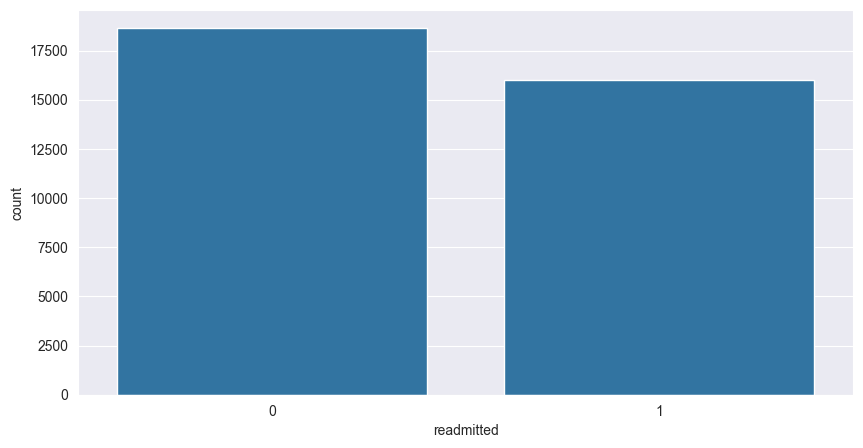

In [19]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(x=df["readmitted"]);

<Axes: xlabel='race'>

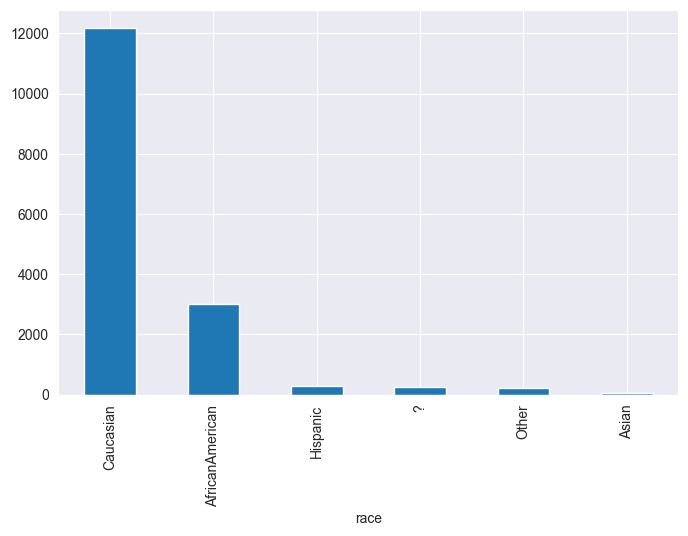

In [20]:
plt.rcParams['figure.figsize']= [8.0, 5.0]
df.loc[df['readmitted'].isin(['1','Yes',1]),'race'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Age')

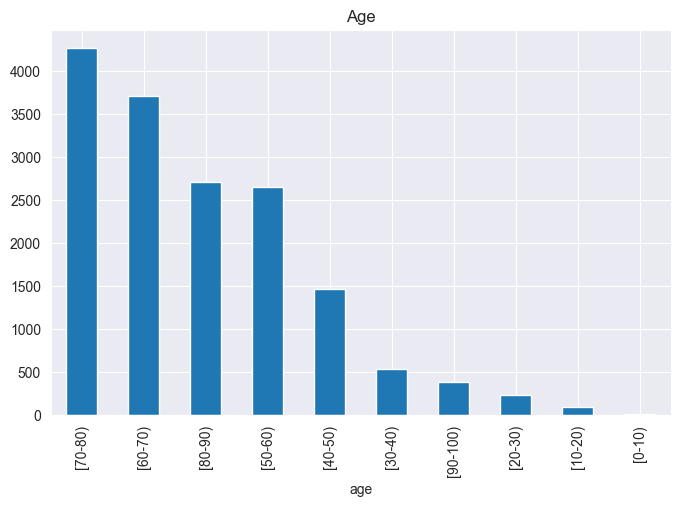

In [21]:
df.loc[df['readmitted'].isin(['1','Yes',1]),'age'].value_counts().plot(kind='bar')
plt.title("Age")

<Axes: >

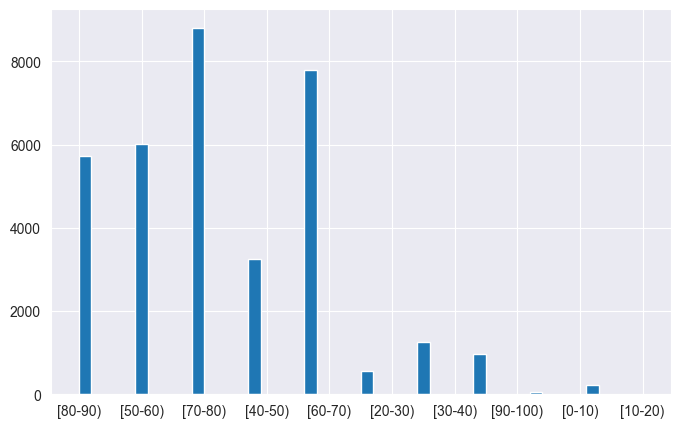

In [22]:
df.age.hist(width=.2)

In [23]:
df.medical_specialty.value_counts()

medical_specialty
?                                 16993
InternalMedicine                   4952
Family/GeneralPractice             2608
Emergency/Trauma                   2553
Cardiology                         1834
                                  ...  
Proctology                            1
OutreachServices                      1
Psychiatry-Addictive                  1
DCPTEAM                               1
Pediatrics-Hematology-Oncology        1
Name: count, Length: 63, dtype: int64

In [24]:
df.isna().sum()

index                     0
encounter_id              0
patient_id                0
race                      0
gender                    0
age                       0
weight                    0
time_in_hospital          0
medical_specialty         0
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                    0
diag_2                    0
diag_3                    0
diag_4                    0
diag_5                    0
number_diagnoses          0
X1                    32814
X2                    28865
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X8                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                 

In [25]:
df['diag_1'] =  pd.to_numeric(df['diag_1'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df['diag_2'] =  pd.to_numeric(df['diag_2'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df['diag_3'] =  pd.to_numeric(df['diag_3'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df['diag_4'] =  pd.to_numeric(df['diag_4'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34654 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               34654 non-null  int64  
 1   encounter_id        34654 non-null  int64  
 2   patient_id          34654 non-null  int64  
 3   race                34654 non-null  object 
 4   gender              34654 non-null  object 
 5   age                 34654 non-null  object 
 6   weight              34654 non-null  object 
 7   time_in_hospital    34654 non-null  int64  
 8   medical_specialty   34654 non-null  object 
 9   num_lab_procedures  34654 non-null  int64  
 10  num_procedures      34654 non-null  int64  
 11  num_medications     34654 non-null  int64  
 12  number_outpatient   34654 non-null  int64  
 13  number_emergency    34654 non-null  int64  
 14  number_inpatient    34654 non-null  int64  
 15  diag_1              34058 non-null  float64
 16  diag_2   

In [27]:
df = df.replace('?', np.nan)

In [28]:
df.isna().sum()

index                     0
encounter_id              0
patient_id                0
race                    804
gender                    0
age                       0
weight                33563
time_in_hospital          0
medical_specialty     16993
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                  596
diag_2                  927
diag_3                 2202
diag_4                 2202
diag_5                    0
number_diagnoses          0
X1                    32814
X2                    28865
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X8                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34654 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               34654 non-null  int64  
 1   encounter_id        34654 non-null  int64  
 2   patient_id          34654 non-null  int64  
 3   race                33850 non-null  object 
 4   gender              34654 non-null  object 
 5   age                 34654 non-null  object 
 6   weight              1091 non-null   object 
 7   time_in_hospital    34654 non-null  int64  
 8   medical_specialty   17661 non-null  object 
 9   num_lab_procedures  34654 non-null  int64  
 10  num_procedures      34654 non-null  int64  
 11  num_medications     34654 non-null  int64  
 12  number_outpatient   34654 non-null  int64  
 13  number_emergency    34654 non-null  int64  
 14  number_inpatient    34654 non-null  int64  
 15  diag_1              34058 non-null  float64
 16  diag_2   

In [30]:
df_pp = df.copy()
df_pp

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),NaN,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
2,82347,256497366,30023982,Caucasian,Female,[50-60),NaN,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),NaN,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1
7,91744,313193054,171347630,Caucasian,Female,[40-50),NaN,4,NaN,15,...,No,No,No,No,No,No,No,No,No,0
8,27014,88645302,20811105,Caucasian,Female,[70-80),NaN,13,Family/GeneralPractice,70,...,No,No,No,No,No,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,39934,124202466,23450508,Caucasian,Female,[70-80),NaN,11,InternalMedicine,40,...,No,Steady,No,No,No,No,No,No,Yes,0
66583,47366,145667070,29324601,Caucasian,Male,[80-90),NaN,4,NaN,39,...,No,No,No,No,No,No,No,No,No,1
66584,76555,231061116,2179062,Caucasian,Female,[60-70),NaN,2,NaN,24,...,No,No,No,No,No,No,No,No,Yes,1
66585,25392,84911682,20531754,NaN,Female,[80-90),NaN,4,InternalMedicine,39,...,No,No,No,No,No,No,No,No,No,0


In [31]:
df_pp=df_pp.drop(['weight','race','medical_specialty','index','encounter_id','patient_id','X8','X18','X19','X25'], axis=1)

In [32]:
df_pp.head(5)

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,X16,X17,X20,X21,X22,X23,X24,change,diabetesMed,readmitted
0,Male,[80-90),4,39,1,9,1,1,4,783.0,...,No,No,No,No,No,No,No,No,Yes,1
2,Female,[50-60),6,50,2,24,0,0,5,574.0,...,No,No,Down,No,No,No,No,Ch,Yes,1
4,Male,[70-80),9,17,1,11,0,0,0,311.0,...,No,No,No,No,No,No,No,No,No,1
7,Female,[40-50),4,15,3,17,0,0,0,552.0,...,No,No,No,No,No,No,No,No,No,0
8,Female,[70-80),13,70,5,32,0,0,0,427.0,...,No,No,No,No,No,No,No,No,Yes,0


In [33]:
display(df_pp)

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,X16,X17,X20,X21,X22,X23,X24,change,diabetesMed,readmitted
0,Male,[80-90),4,39,1,9,1,1,4,783.0,...,No,No,No,No,No,No,No,No,Yes,1
2,Female,[50-60),6,50,2,24,0,0,5,574.0,...,No,No,Down,No,No,No,No,Ch,Yes,1
4,Male,[70-80),9,17,1,11,0,0,0,311.0,...,No,No,No,No,No,No,No,No,No,1
7,Female,[40-50),4,15,3,17,0,0,0,552.0,...,No,No,No,No,No,No,No,No,No,0
8,Female,[70-80),13,70,5,32,0,0,0,427.0,...,No,No,No,No,No,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,Female,[70-80),11,40,4,35,0,0,0,562.0,...,No,No,Steady,No,No,No,No,No,Yes,0
66583,Male,[80-90),4,39,1,7,0,0,0,188.0,...,No,No,No,No,No,No,No,No,No,1
66584,Female,[60-70),2,24,1,13,0,0,2,996.0,...,No,No,No,No,No,No,No,No,Yes,1
66585,Female,[80-90),4,39,1,14,0,0,0,427.0,...,No,No,No,No,No,No,No,No,No,0


In [34]:
df_pp.isnull().mean() * 100

gender                 0.000000
age                    0.000000
time_in_hospital       0.000000
num_lab_procedures     0.000000
num_procedures         0.000000
num_medications        0.000000
number_outpatient      0.000000
number_emergency       0.000000
number_inpatient       0.000000
diag_1                 1.719859
diag_2                 2.675016
diag_3                 6.354245
diag_4                 6.354245
diag_5                 0.000000
number_diagnoses       0.000000
X1                    94.690368
X2                    83.294858
X3                     0.000000
X4                     0.000000
X5                     0.000000
X6                     0.000000
X7                     0.000000
X9                     0.000000
X10                    0.000000
X11                    0.000000
X12                    0.000000
X13                    0.000000
X14                    0.000000
X15                    0.000000
X16                    0.000000
X17                    0.000000
X20     

In [35]:
df_pp.isna().sum()

gender                    0
age                       0
time_in_hospital          0
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                  596
diag_2                  927
diag_3                 2202
diag_4                 2202
diag_5                    0
number_diagnoses          0
X1                    32814
X2                    28865
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                       0
X16                       0
X17                       0
X20                       0
X21                       0
X22                       0
X23                       0
X24                 

In [36]:
df_pp.dropna(axis=0, inplace=True)

In [37]:
df_pp.isna().sum()

gender                0
age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X20                   0
X21                   0
X22                   0
X23                   0
X24                   0
change                0
diabetesMed           0
readmitted            0
dtype: int64

In [38]:
df_pp.shape

(88, 39)

In [39]:
df_clean=df_pp

In [40]:
df_clean = pd.get_dummies(df_clean, columns=['change','diabetesMed','age'])

In [41]:
df_clean

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,diabetesMed_No,diabetesMed_Yes,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90)
77,Female,2,70,0,28,3,1,2,491.00,250.02,...,False,True,False,False,False,True,False,False,False,False
129,Male,3,65,0,17,0,0,0,733.00,250.00,...,True,False,False,False,False,True,False,False,False,False
179,Male,5,79,0,15,0,0,0,486.00,590.00,...,False,True,False,False,False,False,False,True,False,False
902,Female,5,41,0,10,1,0,0,250.80,730.00,...,True,False,False,False,False,False,True,False,False,False
2839,Female,6,54,0,8,0,0,0,434.00,250.00,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61899,Male,6,79,0,9,0,0,0,562.00,250.00,...,False,True,False,False,False,False,True,False,False,False
64496,Male,7,57,1,16,0,0,3,250.80,707.00,...,False,True,False,False,False,False,False,False,False,True
65804,Female,3,76,0,9,0,0,0,295.00,276.00,...,False,True,False,False,False,True,False,False,False,False
66038,Male,6,79,3,11,0,0,0,250.12,584.00,...,False,True,False,False,False,True,False,False,False,False


In [42]:
df_clean.columns

Index(['gender', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5',
       'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X20', 'X21',
       'X22', 'X23', 'X24', 'readmitted', 'change_Ch', 'change_No',
       'diabetesMed_No', 'diabetesMed_Yes', 'age_[10-20)', 'age_[20-30)',
       'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)',
       'age_[70-80)', 'age_[80-90)'],
      dtype='object')

In [43]:
df_clean = pd.get_dummies(df_clean, columns=[ 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X20', 'X21',
       'X22', 'X23', 'X24','gender'])

In [44]:
df_clean


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,...,X20_Down,X20_No,X20_Steady,X20_Up,X21_No,X22_No,X23_No,X24_No,gender_Female,gender_Male
77,2,70,0,28,3,1,2,491.00,250.02,276.0,...,False,True,False,False,True,True,True,True,True,False
129,3,65,0,17,0,0,0,733.00,250.00,466.0,...,False,True,False,False,True,True,True,True,False,True
179,5,79,0,15,0,0,0,486.00,590.00,414.0,...,False,True,False,False,True,True,True,True,False,True
902,5,41,0,10,1,0,0,250.80,730.00,707.0,...,False,True,False,False,True,True,True,True,True,False
2839,6,54,0,8,0,0,0,434.00,250.00,280.0,...,False,True,False,False,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61899,6,79,0,9,0,0,0,562.00,250.00,401.0,...,False,True,False,False,True,True,True,True,False,True
64496,7,57,1,16,0,0,3,250.80,707.00,785.0,...,False,True,False,False,True,True,True,True,False,True
65804,3,76,0,9,0,0,0,295.00,276.00,300.0,...,False,True,False,False,True,True,True,True,True,False
66038,6,79,3,11,0,0,0,250.12,584.00,276.0,...,True,False,False,False,True,True,True,True,False,True


In [45]:
df_clean.shape

(88, 69)

In [46]:
df_pp.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,X16,X17,X20,X21,X22,X23,X24,change,diabetesMed,readmitted
77,Female,[40-50),2,70,0,28,3,1,2,491.0,...,No,No,No,No,No,No,No,Ch,Yes,1
129,Male,[40-50),3,65,0,17,0,0,0,733.0,...,No,No,No,No,No,No,No,No,No,0
179,Male,[60-70),5,79,0,15,0,0,0,486.0,...,No,No,No,No,No,No,No,No,Yes,0
902,Female,[50-60),5,41,0,10,1,0,0,250.8,...,No,No,No,No,No,No,No,No,No,0
2839,Female,[50-60),6,54,0,8,0,0,0,434.0,...,No,No,No,No,No,No,No,No,No,1


In [63]:
#cat_columns = df_pp.select_dtypes(include=['object']).columns
#num_columns = df_pp.select_dtypes(include=['float64', 'int64']).columns
#target_col = 'readmitted'

#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#for i in ['diag_1', 'diag_2', 'diag_3', 'diag_4']:
 #   df_pp[i] = le.fit_transform(df_pp[i])
#df_pp.head()

#for i in cat_columns:
 #   print('Unique Values in ' + i + ' Column:', end = " ")
  #  print(len(df_preprocessed[i].unique()))

In [64]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 77 to 66179
Data columns (total 69 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_in_hospital    88 non-null     int64  
 1   num_lab_procedures  88 non-null     int64  
 2   num_procedures      88 non-null     int64  
 3   num_medications     88 non-null     int64  
 4   number_outpatient   88 non-null     int64  
 5   number_emergency    88 non-null     int64  
 6   number_inpatient    88 non-null     int64  
 7   diag_1              88 non-null     float64
 8   diag_2              88 non-null     float64
 9   diag_3              88 non-null     float64
 10  diag_4              88 non-null     float64
 11  diag_5              88 non-null     float64
 12  number_diagnoses    88 non-null     int64  
 13  readmitted          88 non-null     int64  
 14  change_Ch           88 non-null     bool   
 15  change_No           88 non-null     bool   
 16  diabetesMed

In [65]:
#df_clean['diag_1'] = df_clean['diag_1'].astype(float)

In [66]:
from sklearn.model_selection import train_test_split

x= df_clean.drop(columns=["readmitted"])
y= df_clean["readmitted"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [67]:
x_train.head(5)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,...,X20_Down,X20_No,X20_Steady,X20_Up,X21_No,X22_No,X23_No,X24_No,gender_Female,gender_Male
52096,14,88,2,34,3,1,0,518.0,250.82,276.00,...,False,True,False,False,True,True,True,True,False,True
65804,3,76,0,9,0,0,0,295.0,276.00,300.00,...,False,True,False,False,True,True,True,True,True,False
50153,4,51,0,12,0,0,0,428.0,425.00,427.00,...,False,True,False,False,True,True,True,True,True,False
40724,5,56,0,6,0,0,0,250.6,357.00,682.00,...,True,False,False,False,True,True,True,True,False,True
60314,7,58,1,11,0,0,1,435.0,294.00,250.02,...,False,False,False,True,True,True,True,True,True,False


In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [69]:
x_train_scaled.shape

(79, 68)

In [70]:
x_train_scaled

array([[1.        , 0.8028169 , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.15384615, 0.63380282, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.23076923, 0.28169014, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.61538462, 0.33802817, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.15384615, 0.47887324, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.30769231, 0.22535211, 0.16666667, ..., 0.        , 0.        ,
        1.        ]])

In [71]:
#from sklearn.feature_selection import SelectKBest

#fs = SelectKBest(k=50)
#x_train_scaled = fs.fit_transform(x_train_scaled, y_train)
#x_test_scaled = fs.transform(x_test_scaled)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train_scaled, y_train)

y_rf = rf.predict(x_test_scaled)

In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#print("Decision Tree: ", classification_report(y_test, y_dtree))
#print("Decision Tree: ", accuracy_score(y_test, y_dtree))


In [79]:
print("Random Forest: ", classification_report(y_test, y_rf))
print("Random Forest: ", accuracy_score(y_test, y_rf))


Random Forest:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.62      0.83      0.71         6

    accuracy                           0.56         9
   macro avg       0.31      0.42      0.36         9
weighted avg       0.42      0.56      0.48         9

Random Forest:  0.5555555555555556


In [80]:
#print("Logistic Regression: ", classification_report(y_test, y_lr))
#print("Logistic Regression: ", accuracy_score(y_test, y_lr))


In [81]:
x_test.shape

(9, 68)

In [82]:
predictions = rf.predict(x_test)

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [83]:
predictions


array([0, 1, 0, 0, 1, 0, 0, 0, 0])

In [84]:
enc


0        197029140
1        163571946
2        256497366
3        289891212
4         81873900
           ...    
66582    124202466
66583    145667070
66584    231061116
66585     84911682
66586    153167502
Name: encounter_id, Length: 66587, dtype: int64

In [85]:
prediction = pd.DataFrame(predictions, columns=['predictions']).to_csv('predictions.csv')